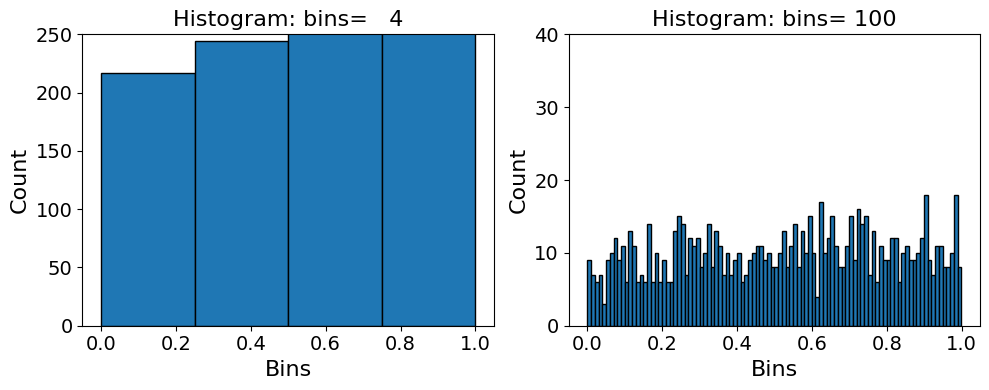

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(1000, 1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
n1bins, n2bins = 4, 100

# Plot first histogram
ax[0].hist(x, bins=n1bins, edgecolor='black')
ax[0].set_ylim(0, 250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d" % (n1bins), fontsize=16)

# Plot second histogram
ax[1].hist(x, bins=n2bins, edgecolor='black')
ax[1].set_ylim(0, 40)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d" % (n2bins), fontsize=16)

plt.tight_layout()
plt.savefig("histograms_uniform.png")
plt.show()

Though the data is from a uniform distribution, the histogram does not appear flat. Why?

The histogram may not appear flat due to insufficient sample size or improper bin selection, leading to uneven distribution representation.
Every time you run it, the histogram looks slightly different? Why?

The histogram looks slightly different each time because the random data generation produces a different set of values every time the code is run.
How do the above observations change (if so how) if you had started with more data?

With more data, the histogram may appear smoother and more uniform, as the increased sample size provides a better representation of the underlying distribution, reducing the effect of fluctuations due to binning.

(array([4.000e+00, 8.000e+00, 3.900e+01, 1.060e+02, 2.300e+02, 4.420e+02,
        7.440e+02, 1.054e+03, 1.437e+03, 1.506e+03, 1.425e+03, 1.206e+03,
        8.370e+02, 5.070e+02, 2.750e+02, 1.200e+02, 3.700e+01, 1.700e+01,
        5.000e+00, 1.000e+00]),
 array([-5.23144829, -4.68720943, -4.14297057, -3.59873171, -3.05449284,
        -2.51025398, -1.96601512, -1.42177626, -0.87753739, -0.33329853,
         0.21094033,  0.75517919,  1.29941806,  1.84365692,  2.38789578,
         2.93213464,  3.47637351,  4.02061237,  4.56485123,  5.10909009,
         5.65332896]),
 <BarContainer object of 20 artists>)

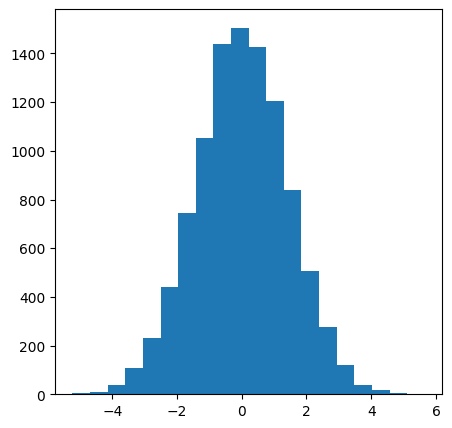

In [ ]:
N = 10000
x1 = np.zeros(N)
for n in range(N):
  x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

What do you observe? How does the resulting histogram change when you change the number of uniform random numbers you add and subtract? Is there a theory that explains your observation?

Observations:

The resulting histogram appears to be approximately normally distributed, centered around 0. As the number of uniform random numbers added and subtracted increases, the histogram tends to resemble a normal distribution more closely. This phenomenon is in line with the Central Limit Theorem (CLT), which states that the distribution of the sum (or average) of a large number of independent, identically distributed random variables approaches a normal distribution, regardless of the original distribution of the variables.

Explanation:

When adding and subtracting a large number of uniformly distributed random numbers, the resulting sum tends to converge towards a normal distribution due to the CLT. Each individual addition and subtraction operation introduces a bit of randomness, but as the number of operations increases (as in the loop), their combined effect tends to approximate a normal distribution. Therefore, regardless of the original uniform distribution of the random numbers, the resulting sum tends towards normality as more random numbers are involved.

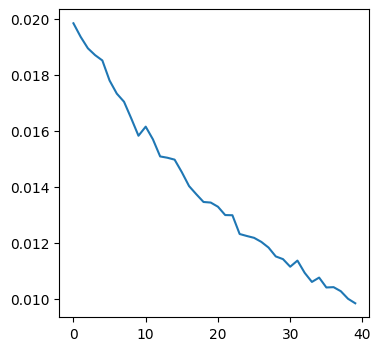

In [ ]:
MaxTrial = 20000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))
for sSize in range(len(sampleSizeRange)):
  numSamples = int(sampleSizeRange[sSize])
  vStrial = np.zeros(MaxTrial)
  for trial in range(MaxTrial):
    xx = np.random.randn(numSamples,1)
    vStrial[trial] = np.var(xx)
  plotVar[sSize] = np.var(vStrial)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot((plotVar))

In [ ]:
def gauss2D(x, m, C):
  Ci = np.linalg.inv(C)
  dC = np.linalg.det(C1)
  num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
  den = 2 * np.pi * dC
  return num/den
def twoDGaussianPlot (nx, ny, m, C):
  x = np.linspace(-5, 5, nx)
  y = np.linspace(-5, 5, ny)
  X, Y = np.meshgrid(x, y, indexing='ij')
  Z = np.zeros([nx, ny])
  for i in range(nx):
    for j in range(ny):
      xvec = np.array([X[i,j], Y[i,j]])
      Z[i,j] = gauss2D(xvec, m, C)
  return X, Y, Z

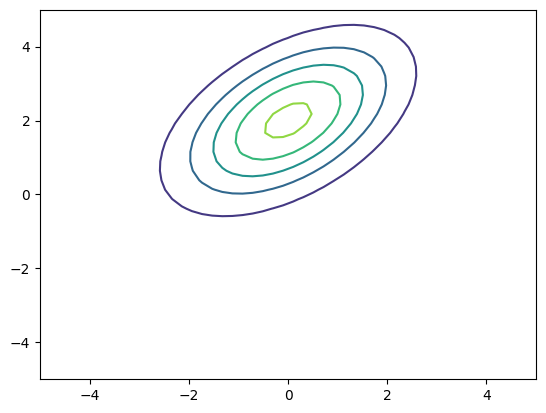

In [ ]:
# Plot contours
#
nx, ny = 50, 40
m = np.array([0,2])
C = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m, C)
plt.contour(Xp, Yp, Zp, 5)

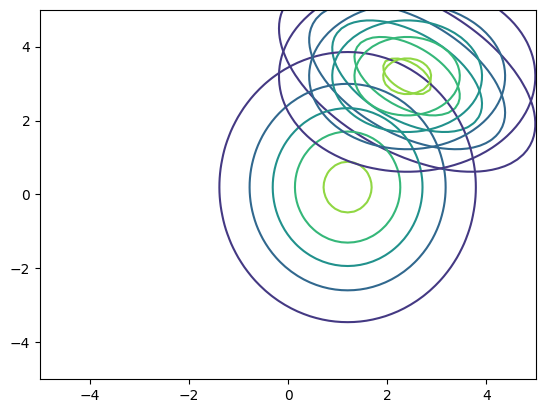

In [ ]:
nx, ny = 80, 80
m1 = np.array([2.4,3.2])
C1 = np.array([[2,-1], [-1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

m2 = np.array([1.2,0.2])
C2 = np.array([[2,0], [0,4]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m2, C2)
plt.contour(Xp, Yp, Zp, 5)

m3 = np.array([2.4,3.2])
C3 = np.array([[2,0], [0,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot (nx, ny, m3, C3)
plt.contour(Xp, Yp, Zp, 5)

In [ ]:
C = np.array([[2.0,1.0], [1.0,2]])
A = np.linalg.cholesky(C)
print(A @ A.T)

[[2. 1.]
 [1. 2.]]


In [ ]:
X = np.random.randn(1000,2)
Y = X @ A
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 2)


(-6.0, 6.0)

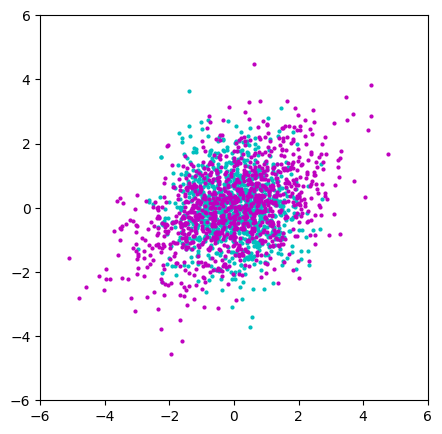

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X[:,0], X[:,1], c="c", s=4)
ax.scatter(Y[:,0], Y[:,1], c="m", s=4)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

In [ ]:
theta = np.pi/3
u = [np.sin(theta), np.cos(theta)]
print("The vector: ", u)
print("Magnitude : ", np.sqrt(u[0]**2 + u[1]**2))
print("Angle : ", theta*180/np.pi)

The vector:  [0.8660254037844386, 0.5000000000000001]
Magnitude :  1.0
Angle :  59.99999999999999


In [ ]:
yp = Y @ u
print(yp.shape)
print("Projected variance: ", np.var(yp))

(1000,)
Projected variance:  2.8548841483301874


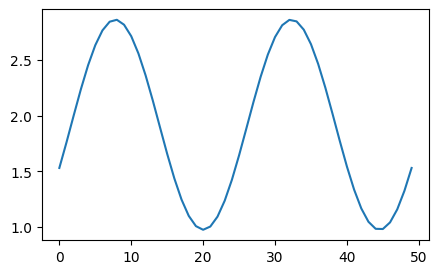

In [ ]:
# Store projected variances in pVars & plot
#
nPoints = 50
pVars = np.zeros(nPoints)
thRange = np.linspace(0, 2*np.pi, nPoints)
for n in range(nPoints):
  theta = thRange[n]
  u = [np.sin(theta), np.cos(theta)]
  pVars[n] = np.var(Y @ u)
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(pVars)

In [ ]:
max_var = np.max(pVars)
min_var = np.min(pVars)

print("Maximum variance:",max_var)
print("Minimum variance:",min_var)

eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

Maximum variance: 2.858012294369908
Minimum variance: 0.9767323398899298
Eigenvalues:  [3. 1.]
Eigenvectors:  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
